# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/ai4i_predictive_maintenance.csv')  
print(df.head())  
print(df.shape)   

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [3]:
drop_cols = ['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df = df.drop(columns=drop_cols)
print(df.shape) 

(10000, 7)


In [4]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)
print(df.head()) 

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  Type_L  Type_M  
0         42.8                0                0   False    True  
1         46.3                3                0    True   False  
2         49.4                5                0    True   False  
3         39.5                7                0    True   False  
4         40.0                9                0    True   False  


In [5]:
df.info()  
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
 6   Type_L                   10000 non-null  bool   
 7   Type_M                   10000 non-null  bool   
dtypes: bool(2), float64(3), int64(3)
memory usage: 488.4 KB
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734    

In [6]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()  
print("Nulls per column:\n", df.isnull().sum())

Duplicates: 0
Nulls per column:
 Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
Type_L                     0
Type_M                     0
dtype: int64


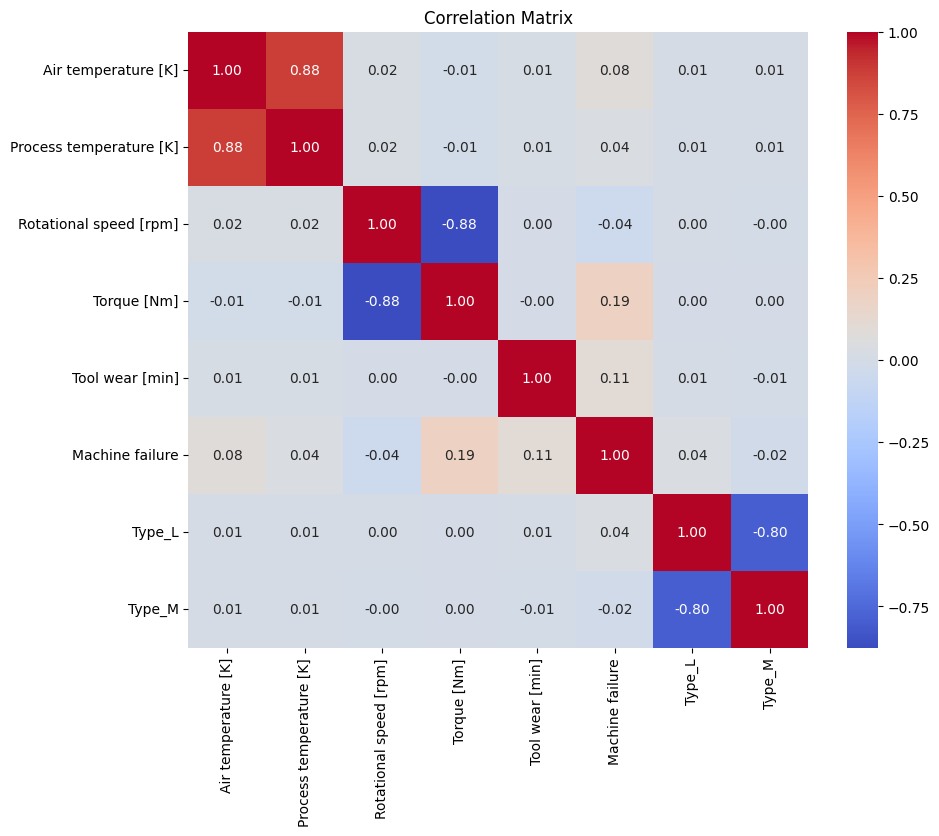

Correlations with Machine failure:
 Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Type_L                     0.035643
Type_M                    -0.022432
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('../reports/correlation_matrix.png')  # Save for reports
plt.show()

print("Correlations with Machine failure:\n", corr['Machine failure'].sort_values(ascending=False))

Class distribution:
 Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64


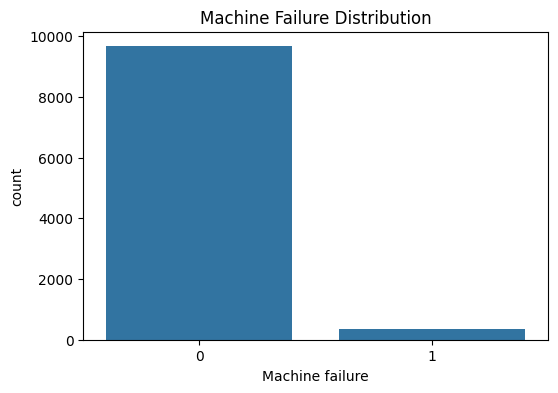

In [8]:
print("Class distribution:\n", df['Machine failure'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=df)
plt.title('Machine Failure Distribution')
plt.show()